In [ ]:
import pandas as pd
import numpy as np

In [ ]:
n=10000
mu=10
std=2

In [ ]:
price_vb=pd.Series(np.random.uniform(1,4,size=n))
id=pd.Series(np.arange(0,len(price_vb),1))
event_type=pd.Series(np.random.choice(["type1","type2","type3"],size=len(price_vb)))
click=pd.Series(np.random.choice([0,1],size=len(price_vb)))
df=pd.concat([id,price_vb,event_type,click],axis=1)
df.columns=["id","price_vb","event_type","click"]
df

,id,price_vb,event_type,click
0,0,3.318627,type1,1
1,1,3.186528,type3,0
2,2,2.718424,type2,0
3,3,3.742777,type3,0
4,4,1.455436,type1,0
...,...,...,...,...
9995,9995,1.869700,type3,1
9996,9996,3.400807,type2,0
9997,9997,3.553637,type2,1
9998,9998,3.573349,type2,1


In [ ]:
def get_clustered_sample(df,n1,n2):
  n=len(df)
  K=int(n/n1)
  data=None
  for k in range(K):
    sample_k=df.sample(n1)
    sample_k["cluster"]=np.repeat(k,len(sample_k))
    df=df.drop(index=sample_k.index)
    data=pd.concat([data,sample_k],axis=0)
  random_chosen_clusters=np.random.randint(0,K,size=n2)
  samples=data[data.cluster.isin(random_chosen_clusters)]
  return samples







sample=get_clustered_sample(df=df,n1=100,n2=2)
sample

,id,price_vb,event_type,click,cluster
3813,3813,1.091155,type3,1,61
6367,6367,3.432592,type3,0,61
5240,5240,1.566449,type3,0,61
2562,2562,2.723293,type1,0,61
5400,5400,3.542615,type2,1,61
...,...,...,...,...,...
1401,1401,3.182308,type2,0,80
5384,5384,1.497133,type3,0,80
5430,5430,2.405947,type3,1,80
2647,2647,3.853345,type3,1,80


In [ ]:
#z score outlier detection
data=pd.read_csv("Titanic.csv")
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# New Section

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

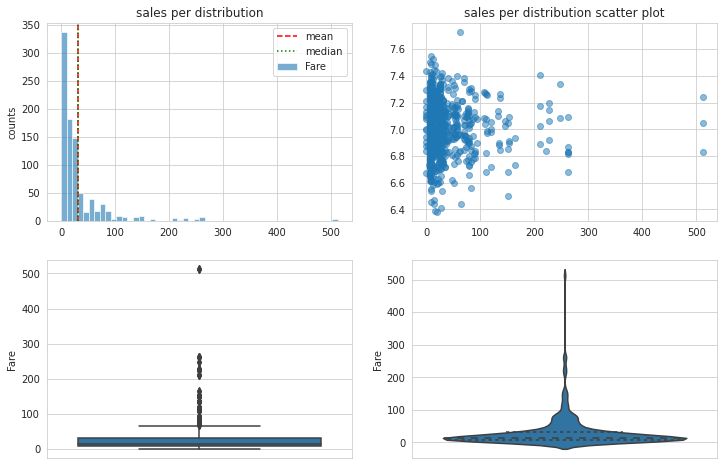

In [ ]:
sns.set_style("whitegrid")
%matplotlib inline
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
data['Fare'].hist(bins=50,label='Fare',alpha=0.6)
plt.axvline(np.mean(data['Fare']),ls='--',c='r',label='mean')
plt.axvline(np.mean(data['Fare']),ls=':',c='g',label='median')
plt.ylabel("counts")
plt.title("sales per distribution")
plt.legend()

plt.subplot(2,2,2)
plt.scatter(data['Fare'],np.random.normal(7,0.2,size=data.shape[0]),alpha=0.5)
plt.title("sales per distribution scatter plot")
plt.subplot(2,2,3)
sns.boxplot(y="Fare",data=data)
plt.subplot(2,2,4)
sns.violinplot(y="Fare",data=data,inner="quartile",bw=0.2)

In [ ]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn
from numpy.random.mtrand import normal
def z_score(df,threshold=1):
  mean,std=np.mean(df),np.std(df)
  z_score1=np.abs(df-mean)/std
  good=z_score1<threshold
  print(f"zscore {threshold} corresponds to a probability of {100*2*norm.sf(3):0.2f}% ")
  print(f"Rejection {(~good).sum()}points")
  return good

In [ ]:
z_score(data['Fare'],threshold=2).sum()

zscore 2 corresponds to a probability of 0.27% 
Rejection 38points


853

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
len(data['Fare'])

891

In [ ]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

zscore 2 corresponds to a probability of 0.27% 
Rejection 38points
zscore 3 corresponds to a probability of 0.27% 
Rejection 20points
zscore 4 corresponds to a probability of 0.27% 
Rejection 11points
zscore 5 corresponds to a probability of 0.27% 
Rejection 3points


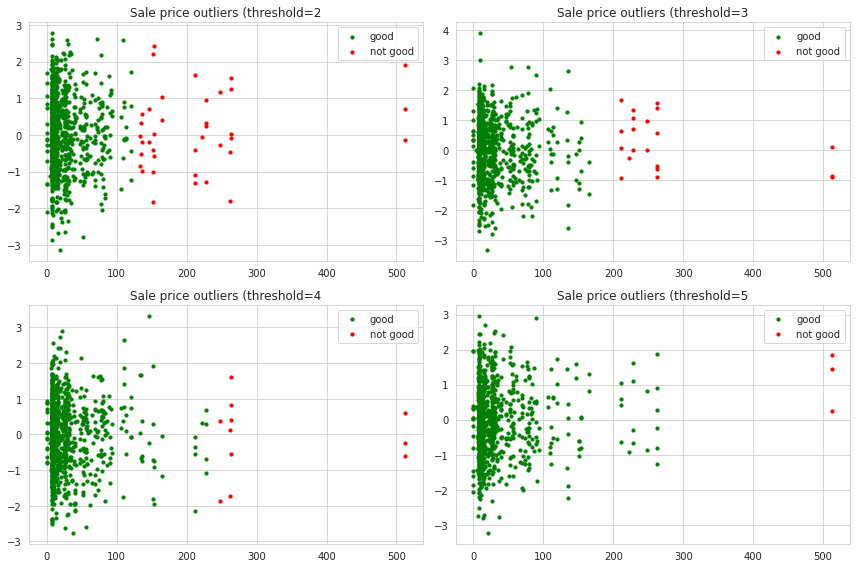

In [ ]:
plt.figure(figsize=(12,8))
for i,threshold in zip(range(1,5),range(2,6)):
  plt.subplot(2,2,i)
  visual_scatter=np.random.normal(size=data.shape[0])
  good=z_score(data['Fare'],threshold=threshold)
  plt.scatter(data['Fare'][good],visual_scatter[good],s=10,label="good",color="g")
  plt.scatter(data['Fare'][~good],visual_scatter[~good],s=10,label="not good",color="r")
  plt.legend()
  plt.title(f"Sale price outliers (threshold={threshold}")
plt.tight_layout()